In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('HR_capstone_dataset.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Pre-Processing

In [3]:
df = data.copy()

In [4]:
df = df.drop('last_evaluation',axis = 1)
#permet d'avoir une précison meilleure de 1 % sur la détection des personnes ayant 0 dans la colonne 'left'

# TrainTest - Nettoyage - Encodage

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
trainset['left'].value_counts(normalize=True)

0    0.76123
1    0.23877
Name: left, dtype: float64

In [8]:
testset['left'].value_counts(normalize=True)

0    0.764667
1    0.235333
Name: left, dtype: float64

In [9]:
def encodage(df):
    df = pd.get_dummies(df, columns=['Department', 'salary', 'number_project', 'time_spend_company'], drop_first=True)
    return df

In [10]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

satisfaction_level       0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
Department               0.0
salary                   0.0
dtype: float64

#### Pas besoin de traiter les valeurs NaN

In [11]:
def preprocessing(df):
    df = encodage(df)

    X = df.drop('left', axis = 1)
    y = df['left']

    print(y.value_counts(normalize=True))
    return X, y

In [12]:
X_train, y_train = preprocessing(trainset)

0    0.76123
1    0.23877
Name: left, dtype: float64


In [13]:
X_test, y_test = preprocessing(testset)

0    0.764667
1    0.235333
Name: left, dtype: float64


# Modelisation

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
model_1 = DecisionTreeClassifier(random_state=42)

In [20]:
model_2 = RandomForestClassifier(random_state=42)

# Evaluation

In [16]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [17]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))  

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[2248   46]
 [  28  678]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.94      0.96      0.95       706

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



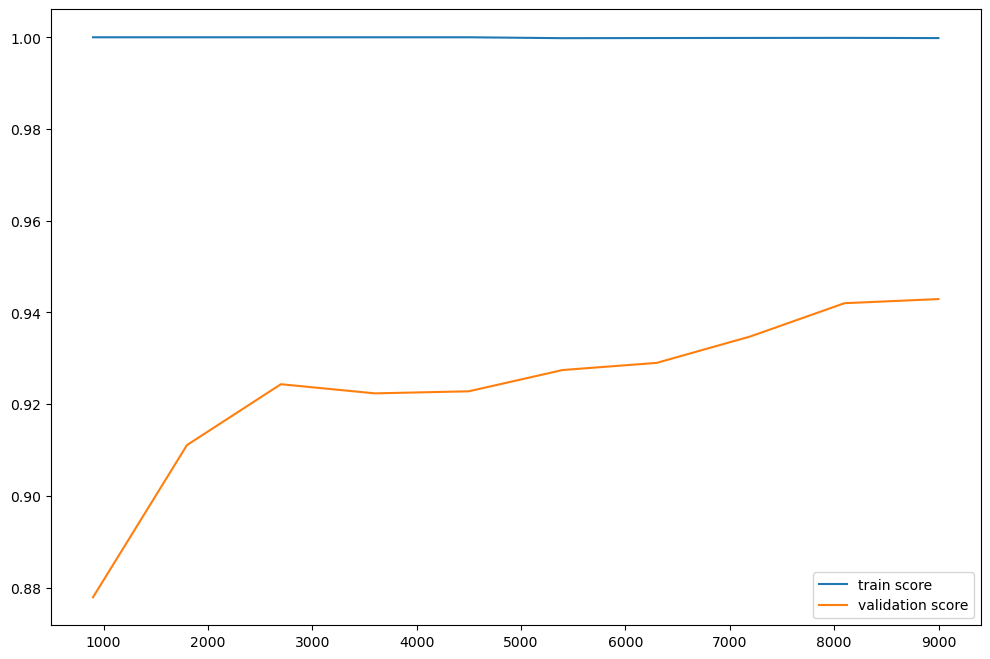

In [18]:
evaluation(model_1)

[[2280   14]
 [  30  676]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



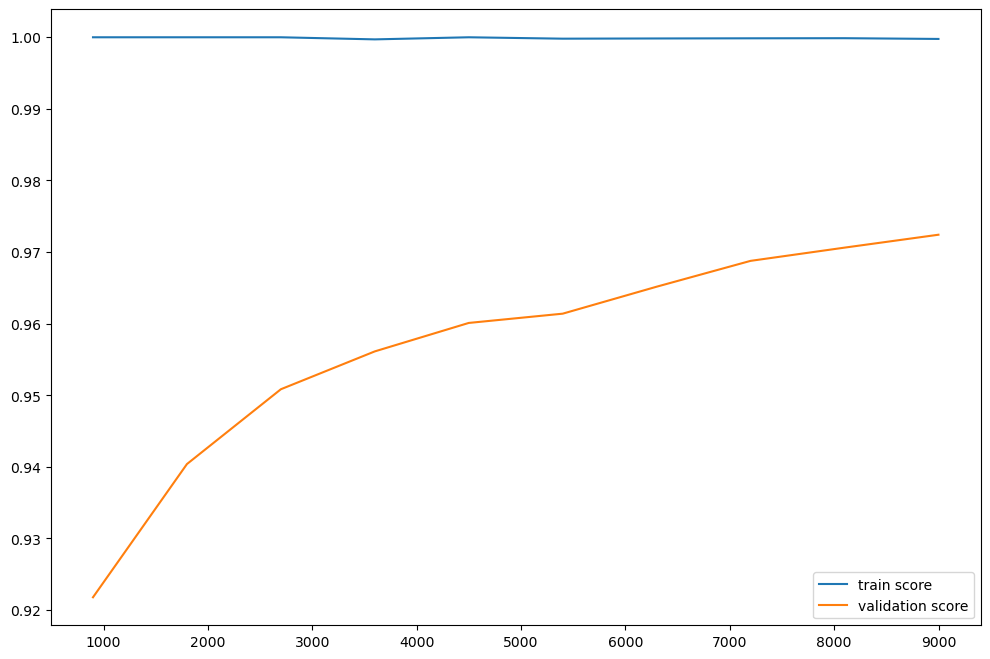

In [21]:
evaluation(model_2)